In [1]:
library(e1071)
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)
library(ISLR)

Warning message:
"package 'e1071' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
transpose(): purrr, data.table
Warning message:
"package 'ISLR' was built under R version 3.4.3"

In [2]:
colorstats <- read.csv('Stats.csv')
head(colorstats)


Percentage.Black,Percentage.White,Percentage.Blue,Percentage.Red,Percentage.Yellow,Percentage.Purple,Percentage.Green,Percentage.Cyan,Number.of.Likes,People,X,X.1,X.2
0.818318,0.095576,0.047477,0.022866,0.004237,0.005483,0.002741,0.003302,16,1,NA,1.000000,NA
0.849782,0.087414,0.025919,0.005545,0.011651,0.004112,0.005545,0.010031,16,1,NA,0.999999,NA
0.666600,0.155867,0.025533,0.065267,0.053267,0.000267,0.000667,0.032533,30,1,NA,1.000001,NA
0.954734,0.022633,0.005658,0.003529,0.007675,0.000112,0.003305,0.002353,197,1,NA,0.999999,NA
0.744310,0.042424,0.000067,0.106465,0.105320,0.000269,0.000539,0.000606,13,1,NA,1.000000,NA
0.037063,0.676587,0.082540,0.004048,0.004206,0.063016,0.000000,0.132540,16,1,NA,1.000000,NA


In [3]:
colorstats %>%
  select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, People, Percentage.Cyan, Number.of.Likes) ->stat

In [11]:
summary(stat)

 Percentage.Black Percentage.White  Percentage.Blue    Percentage.Red   
 Min.   :0.0000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.2234   1st Qu.:0.09813   1st Qu.:0.000808   1st Qu.:0.01226  
 Median :0.4817   Median :0.25860   Median :0.006533   Median :0.04065  
 Mean   :0.4762   Mean   :0.32640   Mean   :0.030907   Mean   :0.07503  
 3rd Qu.:0.7176   3rd Qu.:0.51547   3rd Qu.:0.029091   3rd Qu.:0.10260  
 Max.   :0.9970   Max.   :0.99113   Max.   :0.683704   Max.   :0.66519  
 Percentage.Yellow Percentage.Green   Percentage.Purple      People      
 Min.   :0.00000   Min.   :0.000000   Min.   :0.000000   Min.   : 1.000  
 1st Qu.:0.00480   1st Qu.:0.000000   1st Qu.:0.000238   1st Qu.: 1.000  
 Median :0.02389   Median :0.000200   Median :0.001733   Median : 1.000  
 Mean   :0.04902   Mean   :0.008442   Mean   :0.009477   Mean   : 1.269  
 3rd Qu.:0.06260   3rd Qu.:0.004242   3rd Qu.:0.007600   3rd Qu.: 1.000  
 Max.   :0.74327   Max.   :0.359259   Max.   

In [16]:
maxn <- function(n) function(x) order(x, decreasing = TRUE)[n]

In [4]:
stat %>%
 select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, Percentage.Cyan) ->sorted
cbind(sorted, t(apply(sorted, 1, sort, decreasing = TRUE))) -> sorted1


head(sorted1)

Percentage.Black,Percentage.White,Percentage.Blue,Percentage.Red,Percentage.Yellow,Percentage.Green,Percentage.Purple,Percentage.Cyan,1,2,3,4,5,6,7,8
0.818318,0.095576,0.047477,0.022866,0.004237,0.002741,0.005483,0.003302,0.818318,0.095576,0.047477,0.022866,0.005483,0.004237,0.003302,0.002741
0.849782,0.087414,0.025919,0.005545,0.011651,0.005545,0.004112,0.010031,0.849782,0.087414,0.025919,0.011651,0.010031,0.005545,0.005545,0.004112
0.666600,0.155867,0.025533,0.065267,0.053267,0.000667,0.000267,0.032533,0.666600,0.155867,0.065267,0.053267,0.032533,0.025533,0.000667,0.000267
0.954734,0.022633,0.005658,0.003529,0.007675,0.003305,0.000112,0.002353,0.954734,0.022633,0.007675,0.005658,0.003529,0.003305,0.002353,0.000112
0.744310,0.042424,0.000067,0.106465,0.105320,0.000539,0.000269,0.000606,0.744310,0.106465,0.105320,0.042424,0.000606,0.000539,0.000269,0.000067
0.037063,0.676587,0.082540,0.004048,0.004206,0.000000,0.063016,0.132540,0.676587,0.132540,0.082540,0.063016,0.037063,0.004206,0.004048,0.000000


In [5]:
colnames(sorted1) <- c("Percentage.Black", "Percentage.White", "Percentage.Blue", "Percentage.Red", "Percentage.Yellow",
                     "Percentage.Green","Percentage.Purple","Percentage.Cyan", "Color1", "Color2", "Color3",
                     "Color4", "Color5", "Color6", "Color7", "Color8")
sorted1 %>%
 select(Color1, Color2, Color3, Color4, Color5, Color6, Color7, Color8) ->domcolor
head(domcolor)

Color1,Color2,Color3,Color4,Color5,Color6,Color7,Color8
0.818318,0.095576,0.047477,0.022866,0.005483,0.004237,0.003302,0.002741
0.849782,0.087414,0.025919,0.011651,0.010031,0.005545,0.005545,0.004112
0.666600,0.155867,0.065267,0.053267,0.032533,0.025533,0.000667,0.000267
0.954734,0.022633,0.007675,0.005658,0.003529,0.003305,0.002353,0.000112
0.744310,0.106465,0.105320,0.042424,0.000606,0.000539,0.000269,0.000067
0.676587,0.132540,0.082540,0.063016,0.037063,0.004206,0.004048,0.000000


In [6]:
domcolor$Likes <- stat$Number.of.Likes
head(domcolor)

Color1,Color2,Color3,Color4,Color5,Color6,Color7,Color8,Likes
0.818318,0.095576,0.047477,0.022866,0.005483,0.004237,0.003302,0.002741,16
0.849782,0.087414,0.025919,0.011651,0.010031,0.005545,0.005545,0.004112,16
0.666600,0.155867,0.065267,0.053267,0.032533,0.025533,0.000667,0.000267,30
0.954734,0.022633,0.007675,0.005658,0.003529,0.003305,0.002353,0.000112,197
0.744310,0.106465,0.105320,0.042424,0.000606,0.000539,0.000269,0.000067,13
0.676587,0.132540,0.082540,0.063016,0.037063,0.004206,0.004048,0.000000,16


In [7]:
dompcolor <- domcolor
dompcolor$People <- stat$People
head(dompcolor)

Color1,Color2,Color3,Color4,Color5,Color6,Color7,Color8,Likes,People
0.818318,0.095576,0.047477,0.022866,0.005483,0.004237,0.003302,0.002741,16,1
0.849782,0.087414,0.025919,0.011651,0.010031,0.005545,0.005545,0.004112,16,1
0.666600,0.155867,0.065267,0.053267,0.032533,0.025533,0.000667,0.000267,30,1
0.954734,0.022633,0.007675,0.005658,0.003529,0.003305,0.002353,0.000112,197,1
0.744310,0.106465,0.105320,0.042424,0.000606,0.000539,0.000269,0.000067,13,1
0.676587,0.132540,0.082540,0.063016,0.037063,0.004206,0.004048,0.000000,16,1


In [8]:
sorted$Number.of.Likes <- stat$Number.of.Likes
head(sorted)

Percentage.Black,Percentage.White,Percentage.Blue,Percentage.Red,Percentage.Yellow,Percentage.Green,Percentage.Purple,Percentage.Cyan,Number.of.Likes
0.818318,0.095576,0.047477,0.022866,0.004237,0.002741,0.005483,0.003302,16
0.849782,0.087414,0.025919,0.005545,0.011651,0.005545,0.004112,0.010031,16
0.666600,0.155867,0.025533,0.065267,0.053267,0.000667,0.000267,0.032533,30
0.954734,0.022633,0.005658,0.003529,0.007675,0.003305,0.000112,0.002353,197
0.744310,0.042424,0.000067,0.106465,0.105320,0.000539,0.000269,0.000606,13
0.037063,0.676587,0.082540,0.004048,0.004206,0.000000,0.063016,0.132540,16


In [37]:
lmfitsort = lm(Number.of.Likes~., data=sorted)
summary(lmfitsort)


Call:
lm(formula = Number.of.Likes ~ ., data = sorted)

Residuals:
    Min      1Q  Median      3Q     Max 
 -71.19  -29.38  -19.83   -6.28 1621.19 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)        6033349    4482039   1.346    0.179
Percentage.Black  -6033310    4482040  -1.346    0.179
Percentage.White  -6033302    4482040  -1.346    0.179
Percentage.Blue   -6033312    4482041  -1.346    0.179
Percentage.Red    -6033338    4482037  -1.346    0.179
Percentage.Yellow -6033364    4482039  -1.346    0.179
Percentage.Green  -6033350    4482040  -1.346    0.179
Percentage.Purple -6033207    4482030  -1.346    0.179
Percentage.Cyan   -6033210    4482036  -1.346    0.179

Residual standard error: 106.5 on 996 degrees of freedom
Multiple R-squared:  0.009152,	Adjusted R-squared:  0.001193 
F-statistic:  1.15 on 8 and 996 DF,  p-value: 0.3269


In [38]:
lmdc= lm(Likes~., data=domcolor)
summary(lmdc)


Call:
lm(formula = Likes ~ ., data = domcolor)

Residuals:
    Min      1Q  Median      3Q     Max 
 -72.53  -29.18  -19.43   -8.61 1616.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  5936869    4484822   1.324    0.186
Color1      -5936828    4484823  -1.324    0.186
Color2      -5936819    4484821  -1.324    0.186
Color3      -5936848    4484822  -1.324    0.186
Color4      -5936890    4484824  -1.324    0.186
Color5      -5936408    4484828  -1.324    0.186
Color6      -5937779    4484810  -1.324    0.186
Color7      -5935214    4484789  -1.323    0.186
Color8      -5938957    4484975  -1.324    0.186

Residual standard error: 106.7 on 996 degrees of freedom
Multiple R-squared:  0.006188,	Adjusted R-squared:  -0.001795 
F-statistic: 0.7752 on 8 and 996 DF,  p-value: 0.6248


In [39]:
lmdpc = lm(Likes~., data=dompcolor)
summary(lmdpc)


Call:
lm(formula = Likes ~ ., data = dompcolor)

Residuals:
    Min      1Q  Median      3Q     Max 
-127.01  -28.82  -18.20   -7.06 1618.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.906e+06  4.473e+06   1.320   0.1871  
Color1      -5.906e+06  4.473e+06  -1.320   0.1871  
Color2      -5.906e+06  4.473e+06  -1.320   0.1871  
Color3      -5.906e+06  4.473e+06  -1.320   0.1871  
Color4      -5.906e+06  4.473e+06  -1.320   0.1871  
Color5      -5.905e+06  4.473e+06  -1.320   0.1871  
Color6      -5.907e+06  4.473e+06  -1.320   0.1870  
Color7      -5.904e+06  4.473e+06  -1.320   0.1872  
Color8      -5.908e+06  4.474e+06  -1.321   0.1869  
People       8.695e+00  3.528e+00   2.465   0.0139 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.4 on 995 degrees of freedom
Multiple R-squared:  0.01222,	Adjusted R-squared:  0.003283 
F-statistic: 1.367 on 9 and 995 DF,  p-value: 0.1983


In [6]:
lm.fit = lm(Number.of.Likes~., data=stat) 

In [7]:
summary(lm.fit)


Call:
lm(formula = Number.of.Likes ~ ., data = stat)

Residuals:
    Min      1Q  Median      3Q     Max 
-139.22  -28.54  -18.34   -5.00 1623.92 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        5.973e+06  4.470e+06   1.336   0.1817  
Percentage.Black  -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.White  -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.Blue   -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.Red    -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.Yellow -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.Green  -5.973e+06  4.470e+06  -1.336   0.1817  
Percentage.Purple -5.973e+06  4.470e+06  -1.336   0.1817  
People             9.055e+00  3.527e+00   2.567   0.0104 *
Percentage.Cyan   -5.973e+06  4.470e+06  -1.336   0.1817  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.2 on 995 degrees of freedom
Multiple R-squared:  0.01567,	Adjusted R-squared:  0.006768 
F-

In [44]:
pairs(stat)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

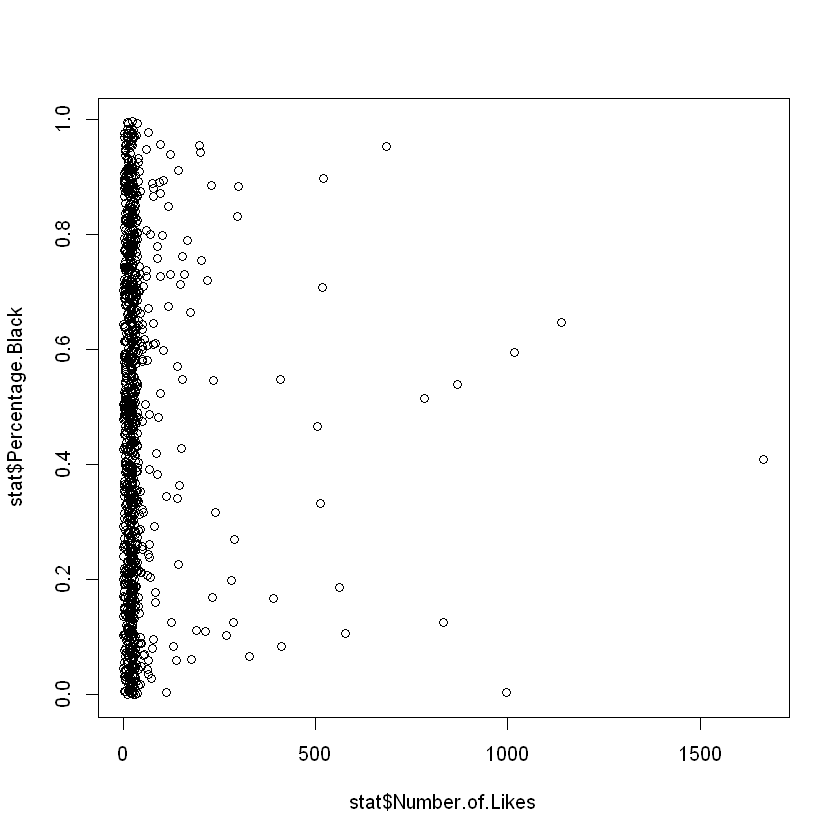

In [9]:
plot(stat$Number.of.Likes, stat$Percentage.Black)

In [40]:
pairs(sorted)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

In [41]:
pairs(domcolor)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

In [ ]:
pairs(dompcolor)

In [12]:
attach(stat)
newdata <- stat[order(Percentage.Black),]
head(newdata)

,Percentage.Black,Percentage.White,Percentage.Blue,Percentage.Red,Percentage.Yellow,Percentage.Green,Percentage.Purple,People,Percentage.Cyan,Number.of.Likes
212,0.000000,0.924127,0.061841,0.000000,0.000000,0.00000,0.000000,1,0.014032,11
517,0.000404,0.986667,0.001347,0.002088,0.002963,0.00000,0.003367,1,0.003165,25
863,0.000600,0.989267,0.000133,0.000600,0.000000,0.00000,0.000133,1,0.009267,9
882,0.000851,0.957447,0.000000,0.004043,0.037660,0.00000,0.000000,1,0.000000,31
131,0.001133,0.944200,0.006200,0.000067,0.009267,0.00000,0.000133,1,0.039000,9
158,0.001263,0.907368,0.000421,0.077614,0.006246,0.00014,0.006456,1,0.000491,21


In [7]:
library(MASS)
lda.fit = lda(Number.of.Likes~., data=stat)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

In [8]:
summary(lda.fit)

        Length Class  Mode     
prior    134   -none- numeric  
counts   134   -none- numeric  
means   1206   -none- numeric  
scaling   72   -none- numeric  
lev      134   -none- character
svd        8   -none- numeric  
N          1   -none- numeric  
call       3   -none- call     
terms      3   terms  call     
xlevels    0   -none- list     

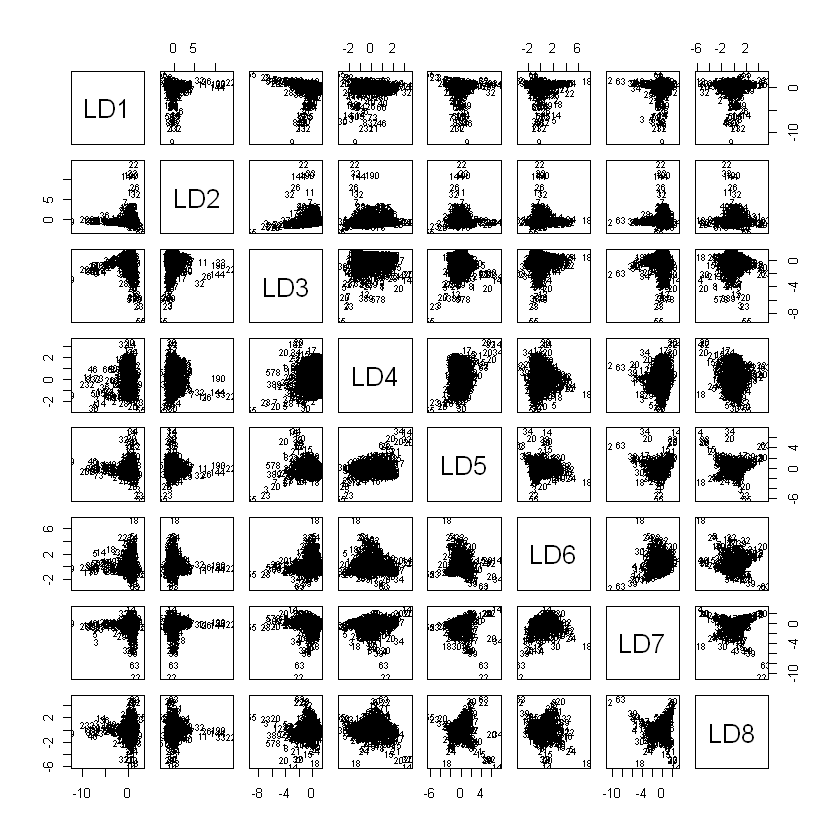

In [9]:
plot(lda.fit)

In [10]:
pr.out=prcomp(stat,scale=TRUE)

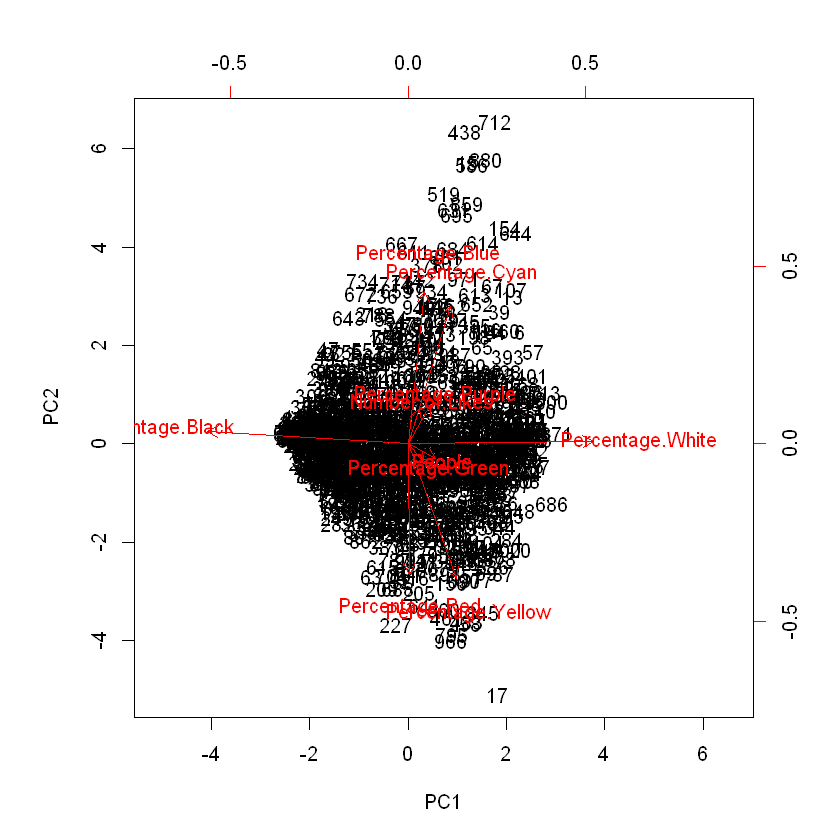

In [11]:
biplot(pr.out,scale=0)

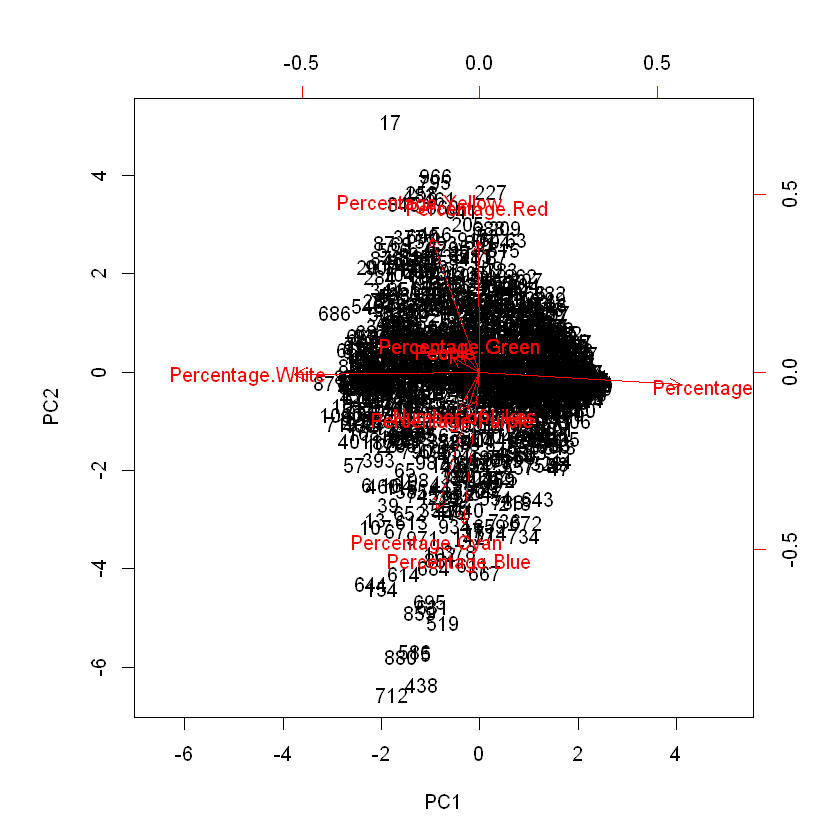

In [12]:
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out,scale=0)

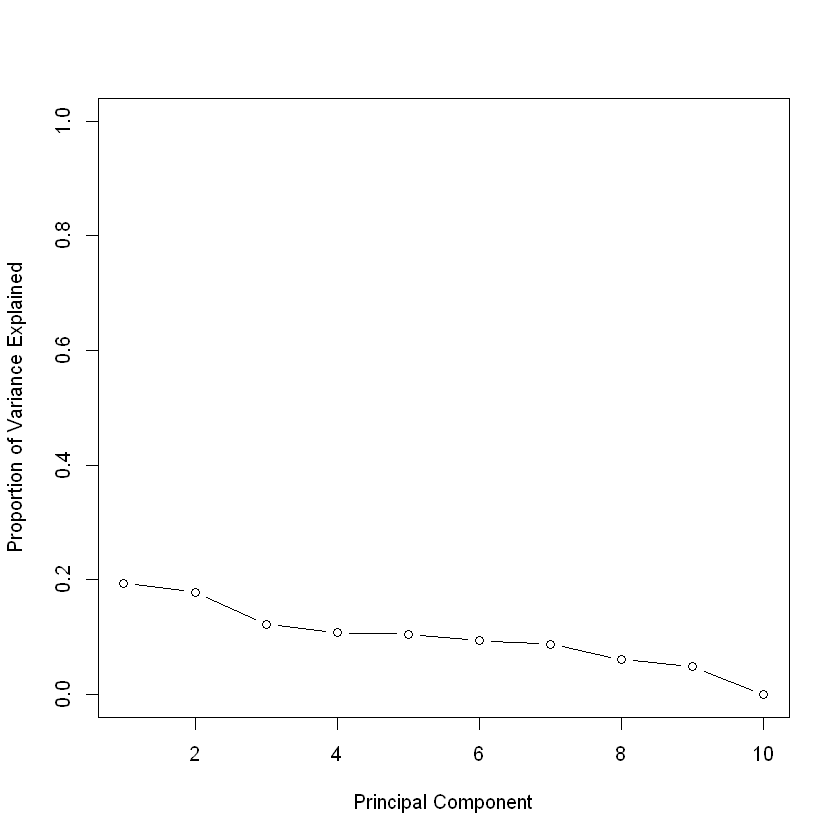

In [13]:
pr.var=pr.out$sdev^2
pve=pr.var/sum(pr.var)
plot(pve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')

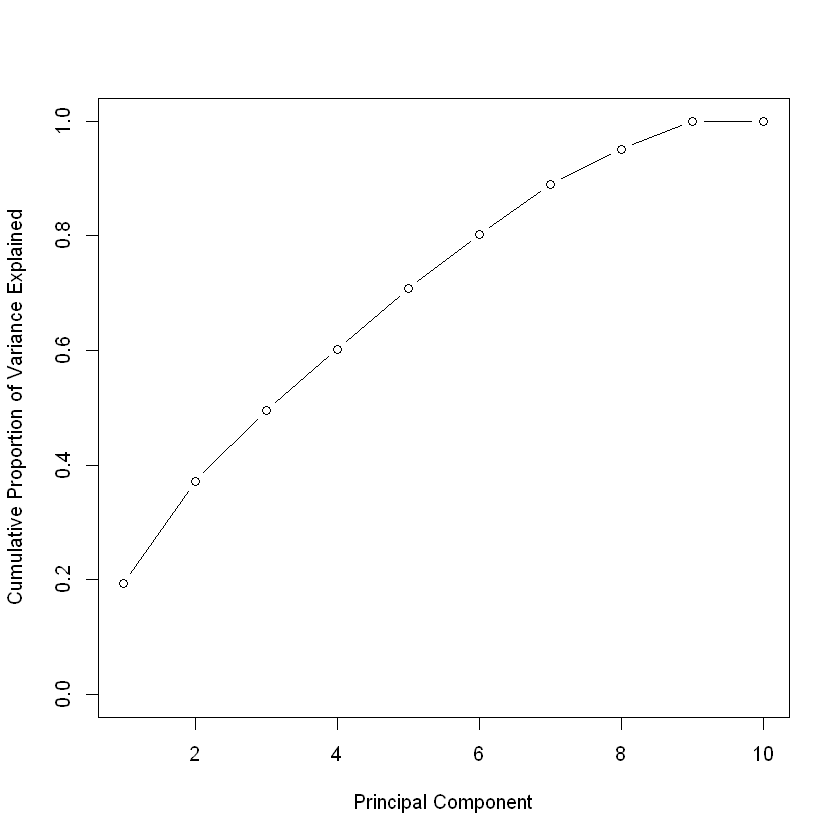

In [14]:
plot(cumsum(pve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

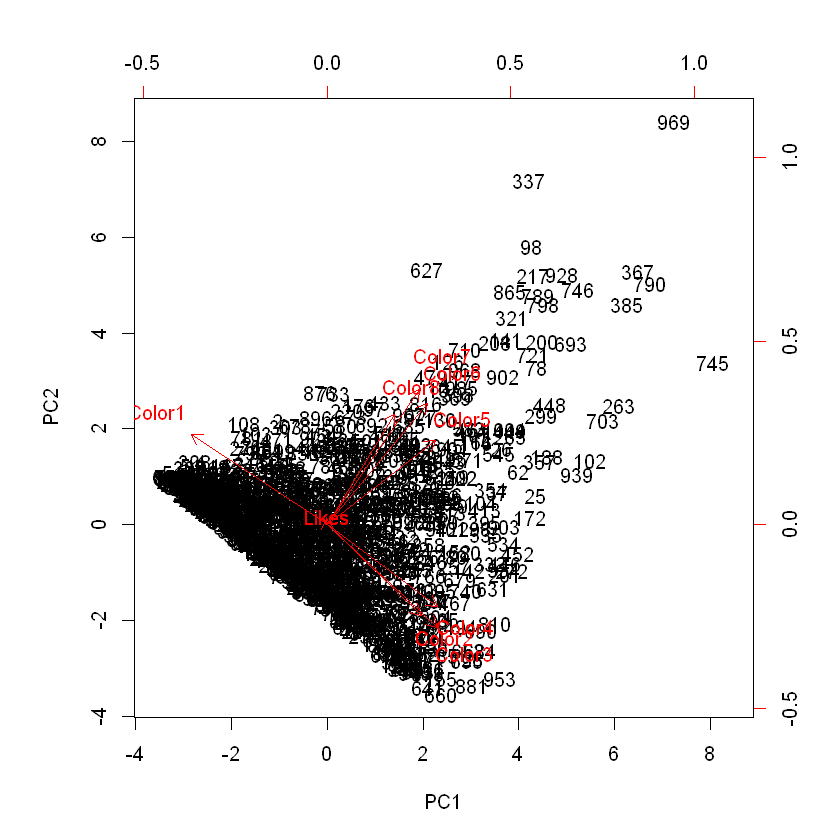

In [9]:
dcpr.out=prcomp(domcolor,scale=TRUE)
biplot(dcpr.out,scale=0)

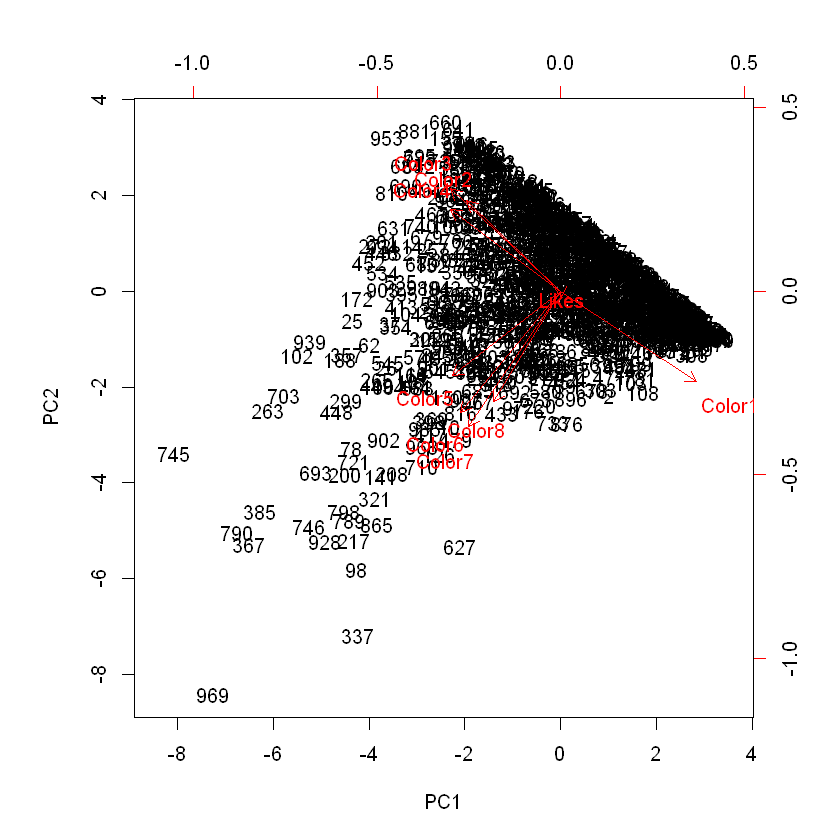

In [10]:
dcpr.out$rotation=-dcpr.out$rotation
dcpr.out$x=-dcpr.out$x
biplot(dcpr.out,scale=0)

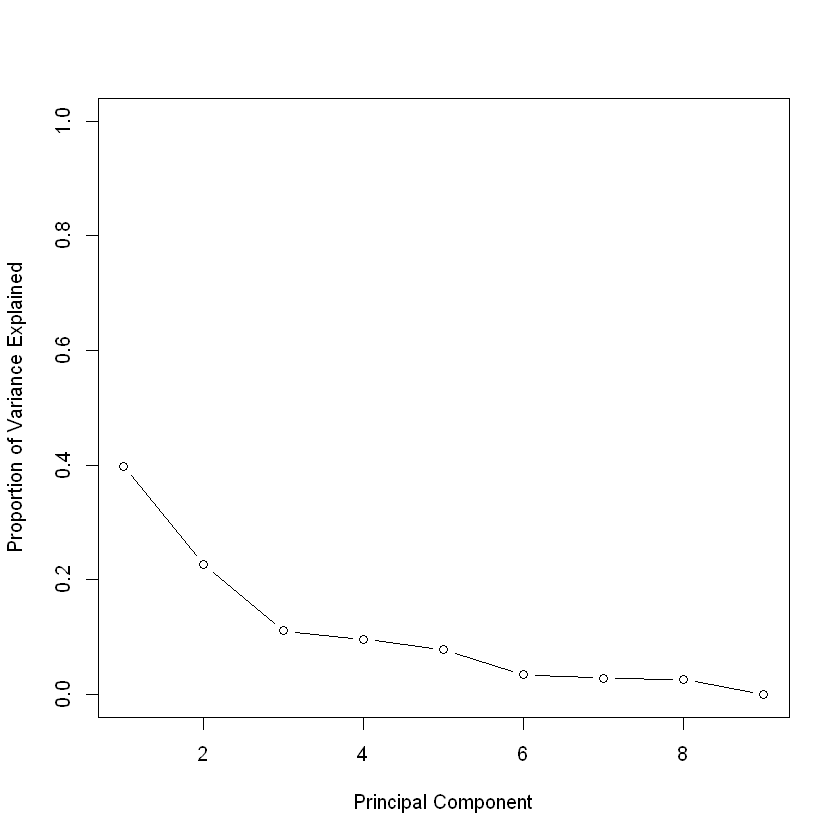

In [11]:
dcpr.var=dcpr.out$sdev^2
dcpve=dcpr.var/sum(dcpr.var)
plot(dcpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')

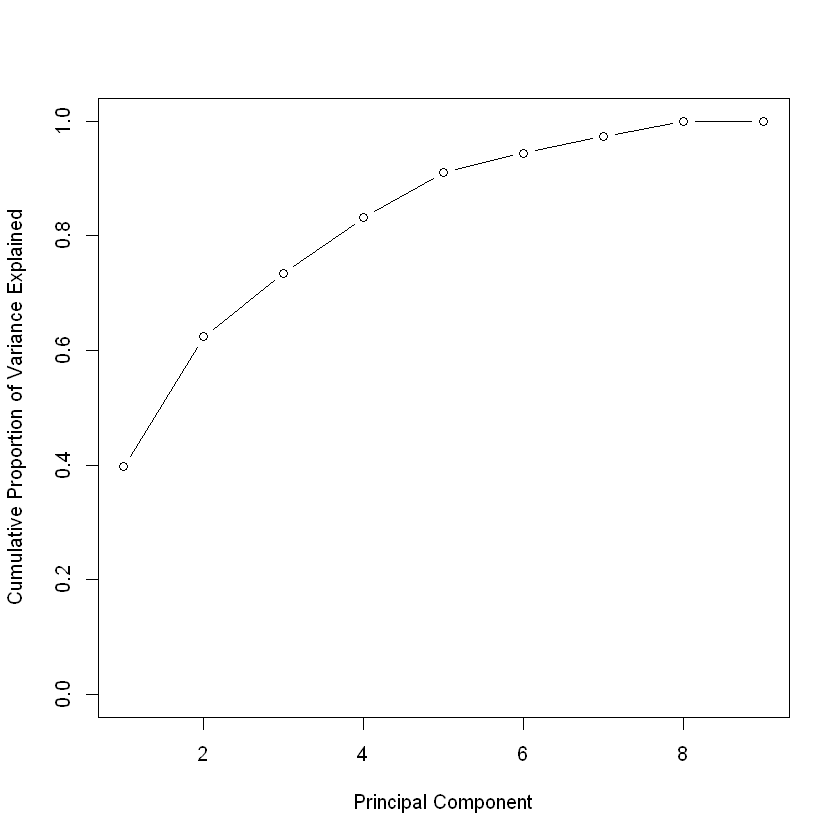

In [12]:
plot(cumsum(dcpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

In [13]:
dcpr.out$center
dcpr.out$rotation
dcpr.out$scale
dcpr.out$sdev

Color1       Color2       Color3       Color4       Color5       Color6 
6.459485e-01 1.981914e-01 8.558826e-02 4.602826e-02 1.455338e-02 6.601631e-03 
      Color7       Color8        Likes 
2.445217e-03 6.432537e-04 4.035323e+01

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Color1,0.463600585,-0.30846069,0.008160540,-0.17333667,0.12268387,0.005808587,-0.021840089,-0.004626793,-8.026399e-01
Color2,-0.319721553,0.30902901,-0.012093334,0.57504934,-0.45690217,0.049202248,-0.117431327,0.046400979,-4.942950e-01
Color3,-0.373625302,0.35023848,0.003766898,-0.19259256,0.34476113,-0.277966441,0.641127887,-0.134041866,-2.747604e-01
Color4,-0.375173695,0.27911045,0.004754029,-0.37026400,0.36057273,0.157690502,-0.678689826,0.008359401,-1.692787e-01
Color5,-0.369343512,-0.28797279,-0.045602531,-0.39210950,-0.31493692,0.404971774,0.251142324,0.541432988,-7.360736e-02
Color6,-0.341218395,-0.41360472,0.010130524,-0.18733927,-0.30222522,0.015572725,-0.036001534,-0.763517374,-3.827570e-02
Color7,-0.312685643,-0.46113599,-0.001887965,0.12699390,0.09172500,-0.724575968,-0.197178014,0.317496908,-1.852041e-02
Color8,-0.227773310,-0.37642260,0.072363325,0.50829336,0.56966430,0.453795652,0.103961597,-0.038780206,-8.180741e-03
Likes,0.001960453,-0.02111567,-0.996156681,0.04183164,0.06212812,0.015109204,-0.003505179,-0.037037662,-1.411379e-07


Color1       Color2       Color3       Color4       Color5       Color6 
1.793329e-01 1.104398e-01 6.138940e-02 3.782173e-02 1.644599e-02 8.551916e-03 
      Color7       Color8        Likes 
4.138026e-03 1.827750e-03 1.065962e+02

[1] 1.891792e+00 1.427460e+00 1.001060e+00 9.322138e-01 8.397863e-01
[6] 5.566986e-01 5.081538e-01 4.888387e-01 3.357360e-06

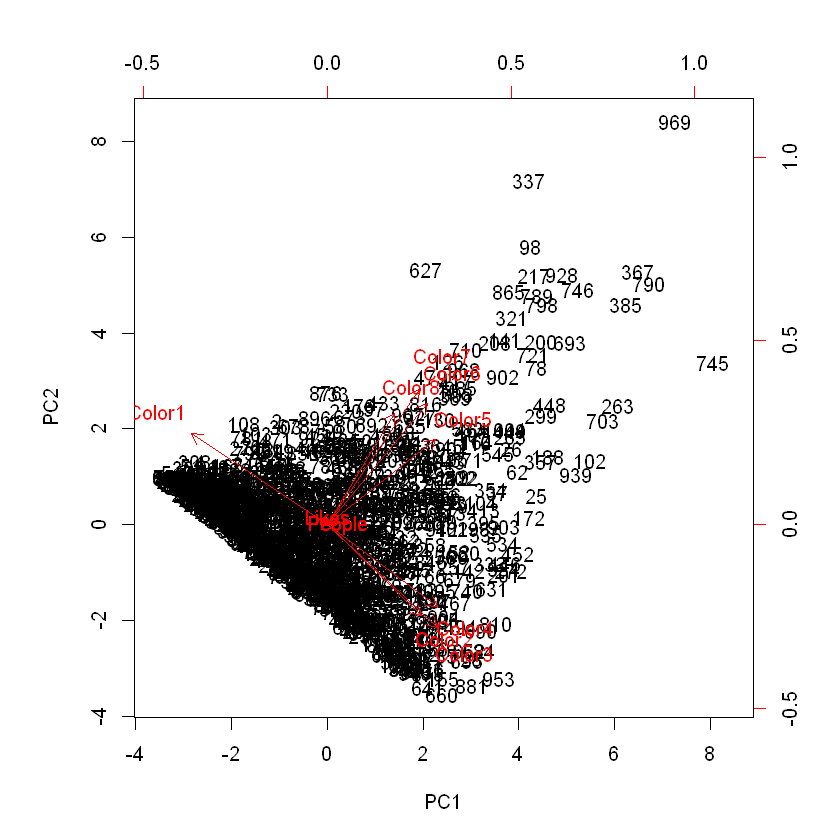

In [14]:
dpcpr.out=prcomp(dompcolor,scale=TRUE)
biplot(dpcpr.out,scale=0)

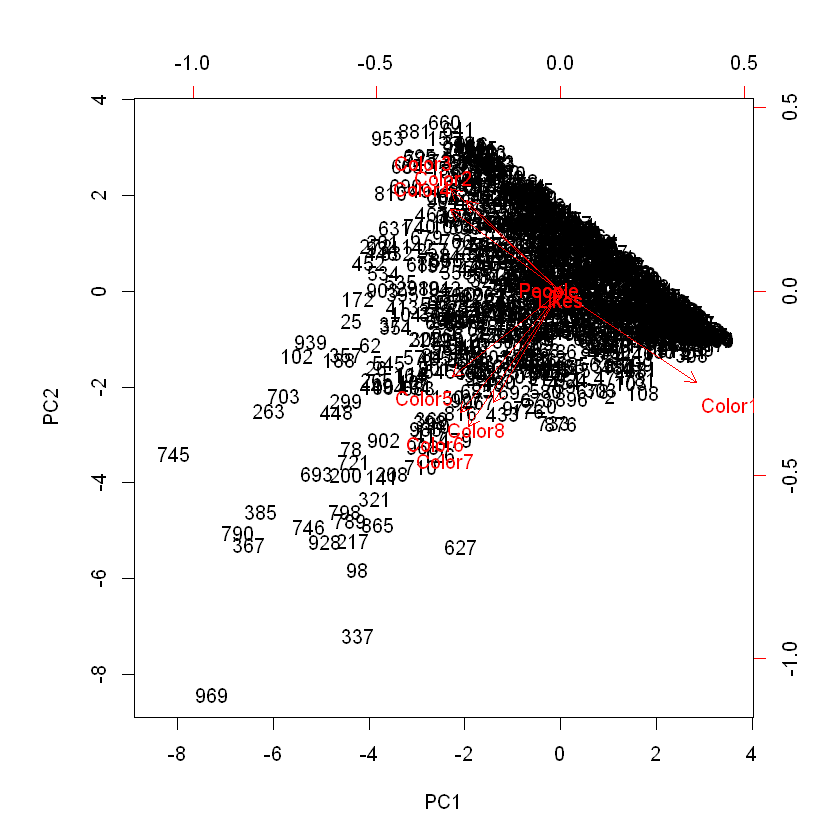

In [15]:
dpcpr.out$rotation=-dpcpr.out$rotation
dpcpr.out$x=-dpcpr.out$x
biplot(dpcpr.out,scale=0)

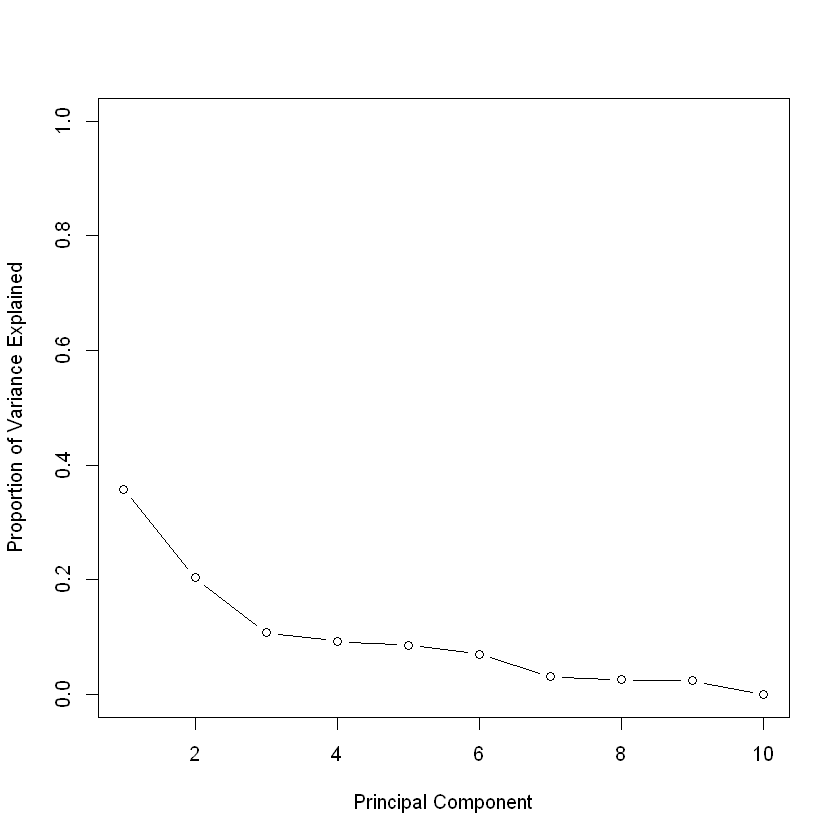

In [16]:
dpcpr.var=dpcpr.out$sdev^2
dpcpve=dpcpr.var/sum(dpcpr.var)
plot(dpcpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')

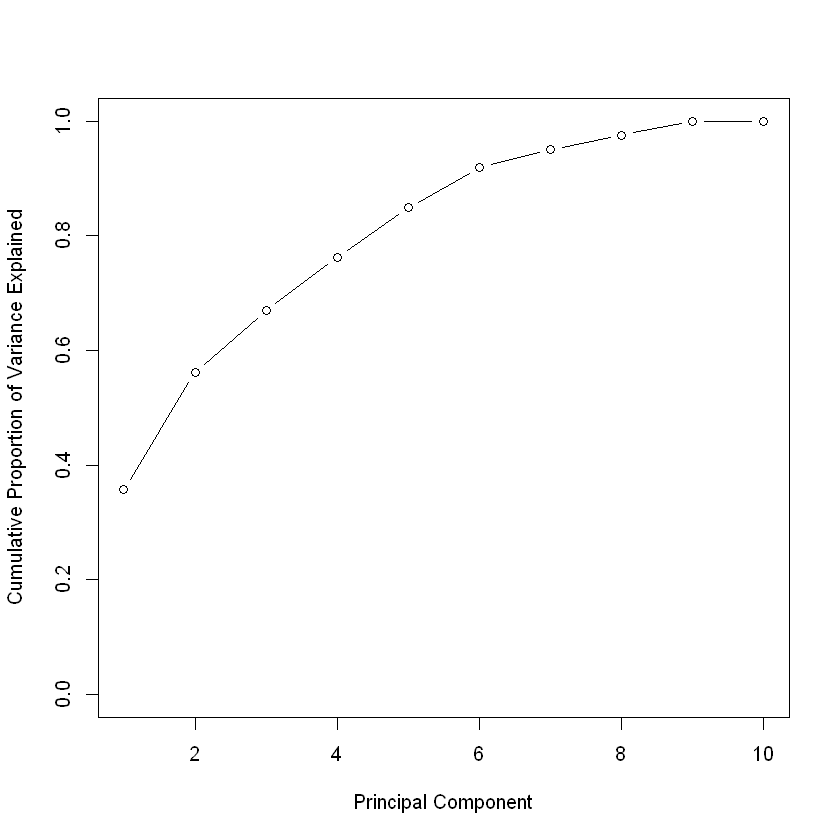

In [17]:
plot(cumsum(dpcpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

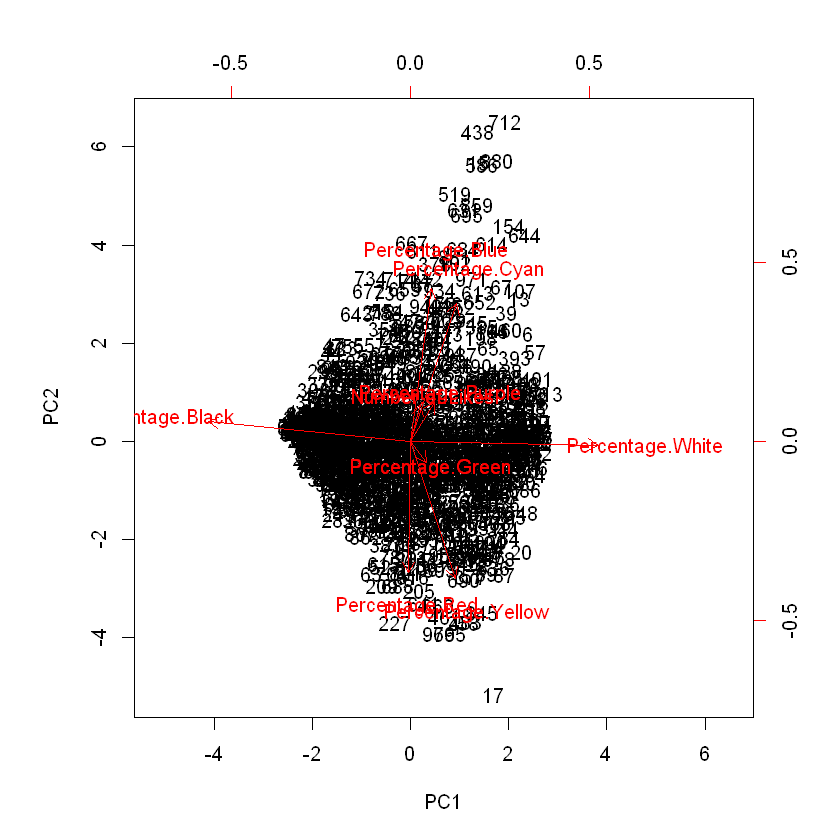

In [18]:
sortpr.out=prcomp(sorted,scale=TRUE)
biplot(sortpr.out,scale=0)

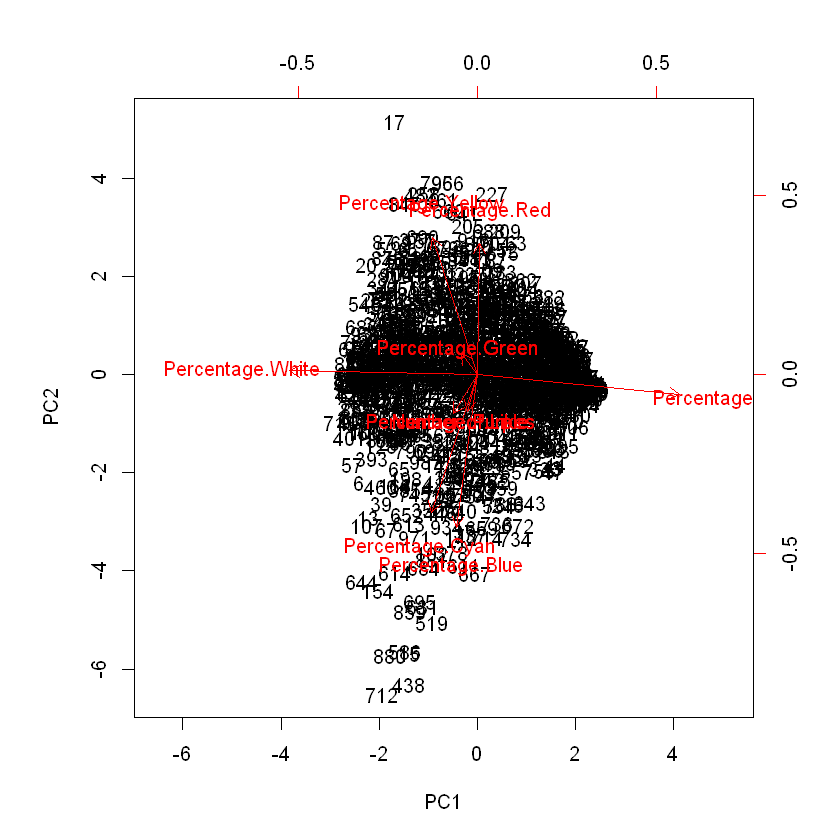

In [19]:
sortpr.out$rotation=-sortpr.out$rotation
sortpr.out$x=-sortpr.out$x
biplot(sortpr.out,scale=0)

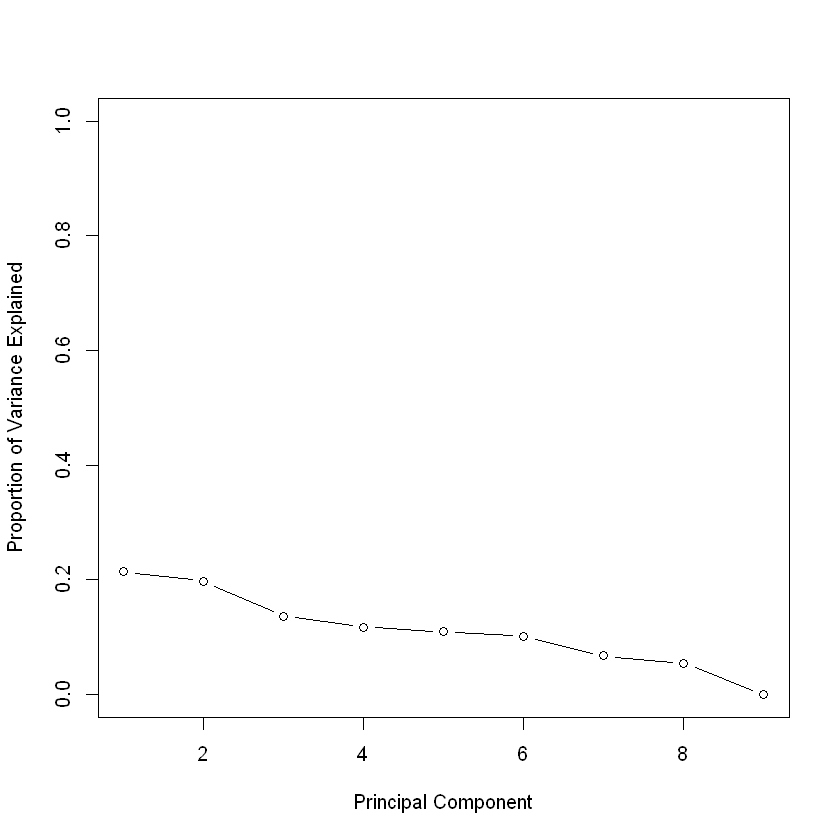

In [20]:
sortpr.var=sortpr.out$sdev^2
sortpve=sortpr.var/sum(sortpr.var)
plot(sortpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')

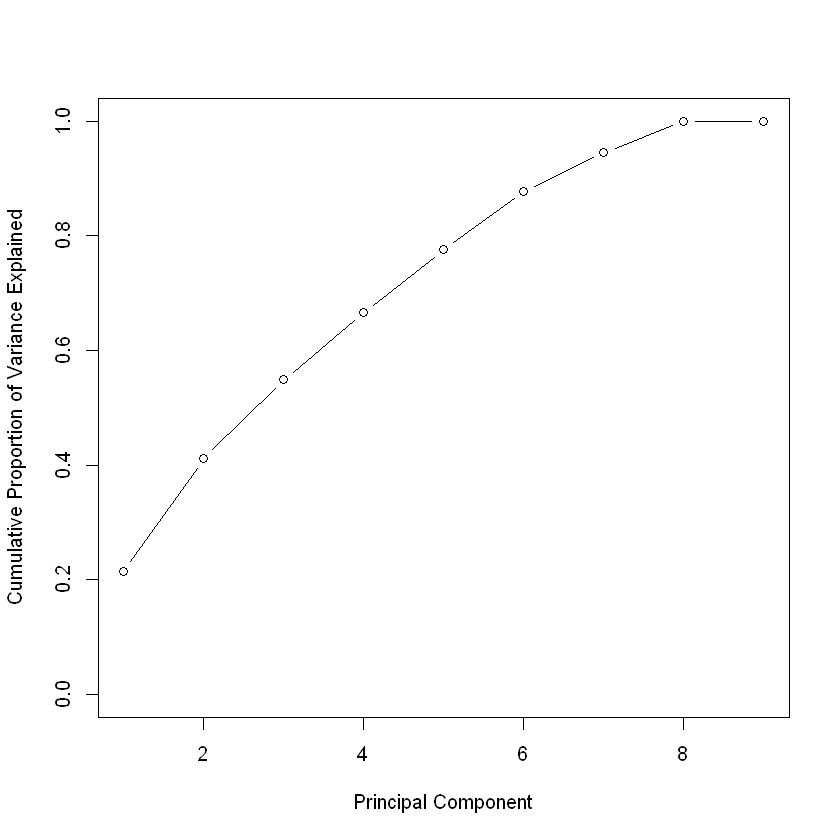

In [21]:
plot(cumsum(sortpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')

In [22]:
#Clustering
set.seed(4)
km.out=kmeans(stat,8,nstart=20)
km.out

K-means clustering with 8 clusters of sizes 10, 10, 52, 4, 262, 221, 24, 422

Cluster means:
  Percentage.Black Percentage.White Percentage.Blue Percentage.Red
1        0.4828932        0.3125621      0.06131880     0.06186840
2        0.3277950        0.4639971      0.06925650     0.03801970
3        0.5232092        0.2972200      0.02239827     0.06931308
4        0.4136133        0.4374880      0.01874850     0.02686700
5        0.4891287        0.3092597      0.03030569     0.08211701
6        0.4652782        0.3246979      0.03501137     0.07901558
7        0.5284918        0.3121880      0.02151396     0.06619633
8        0.4691101        0.3383518      0.02920034     0.07140567
  Percentage.Yellow Percentage.Green Percentage.Purple   People Percentage.Cyan
1        0.02737080      0.000943500       0.010992500 2.300000      0.04205050
2        0.05014060      0.000456000       0.004279000 1.400000      0.04605610
3        0.04212577      0.011592000       0.008530904 1.307692 

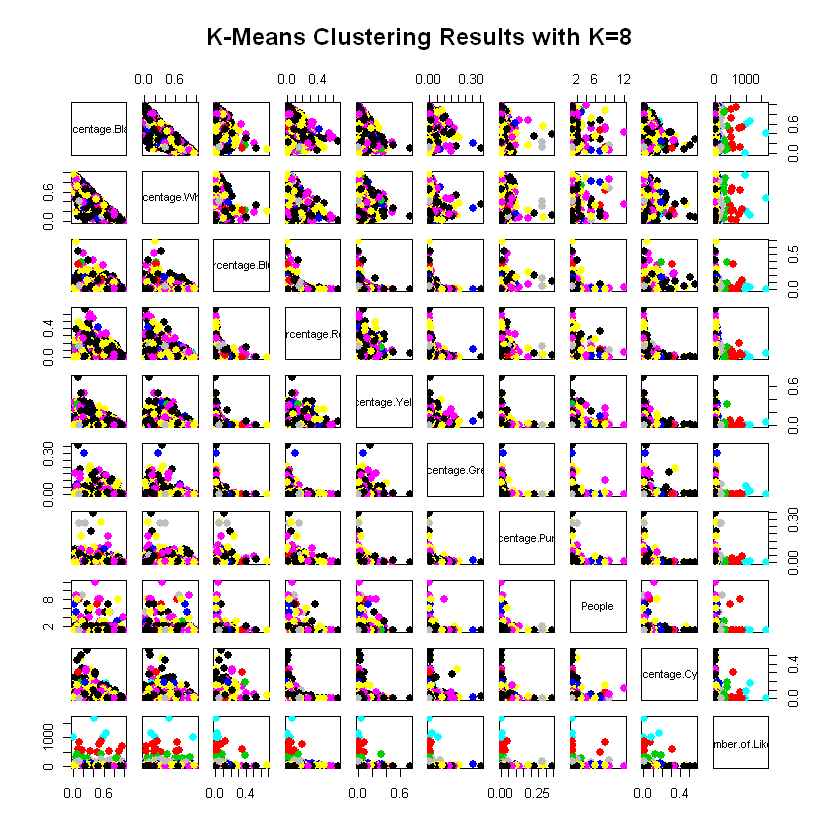

In [28]:
plot(stat,col=(km.out$cluster+1), main="K-Means Clustering Results with K=8", pch=20, cex=2)

In [30]:
set.seed(3)
kmout=kmeans(stat,8,nstart=1)
kmout$tot.withinss

[1] 578236

In [31]:
kmout=kmeans(stat,8,nstart=20)
kmout$tot.withinss

[1] 578236

In [32]:
hc.complete=hclust(dist(stat),method="complete")
hc.average=hclust(dist(stat), method="average")
hc.single=hclust(dist(stat), method="single")

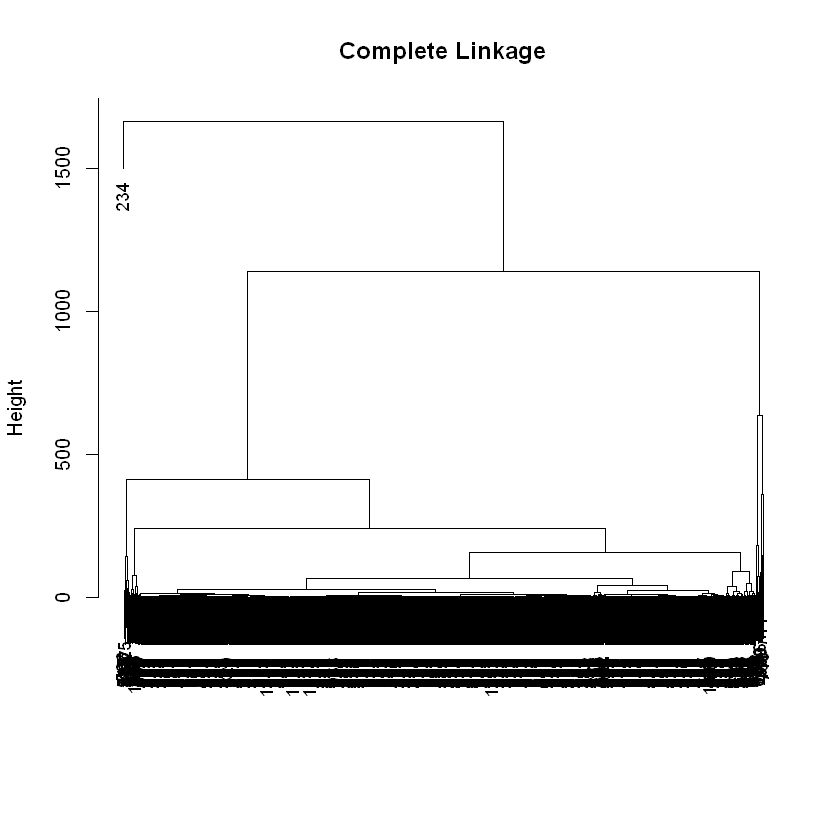

In [33]:
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)

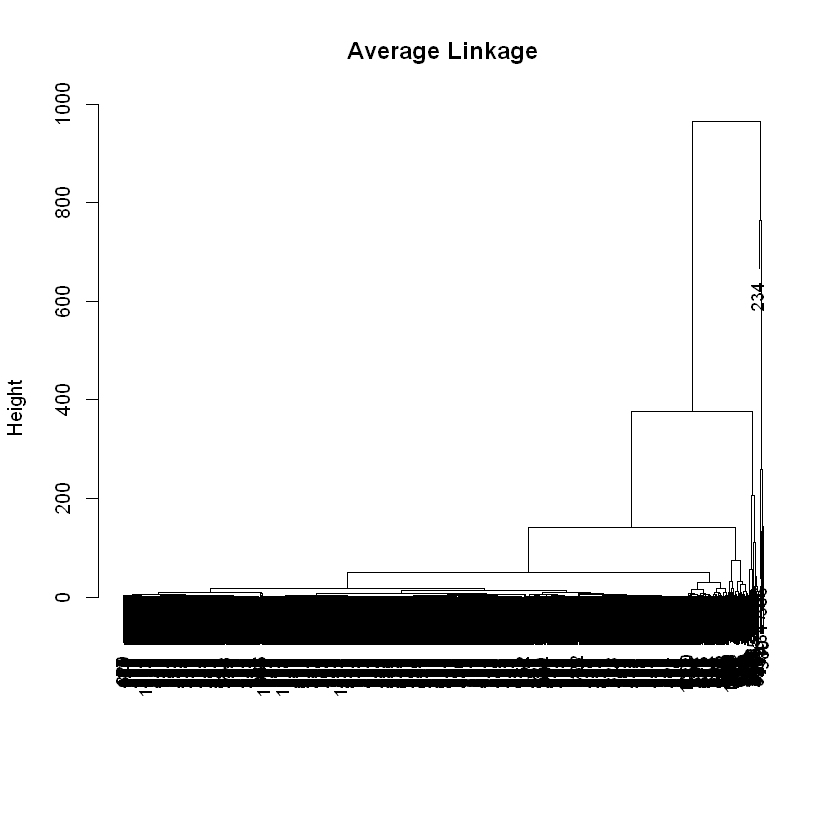

In [34]:
plot(hc.average,main="Average Linkage", xlab="", sub="", cex=.9)

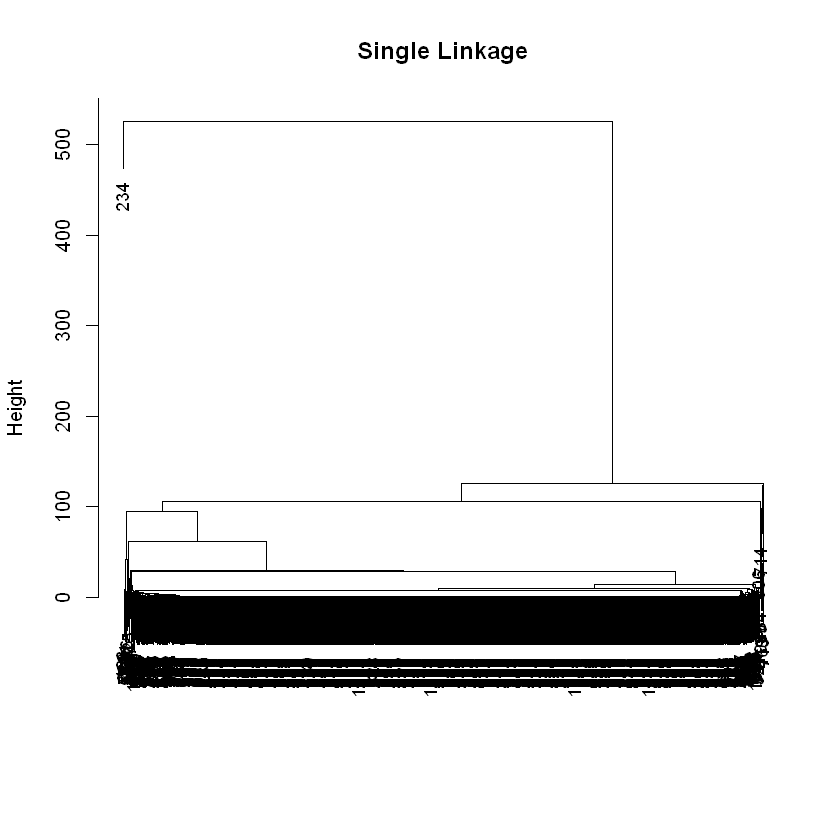

In [35]:
plot(hc.single,main="Single Linkage", xlab="", sub="", cex=.9)

In [36]:
cutree(hc.complete,8)

[1] 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 2 1 1 1 1 1 1 1 5 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 2 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 7 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1
 [704] 1 1 1 1 1 1 1 4 4 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 7 4 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 7
 [926] 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 2

In [37]:
cutree(hc.average,8)

[1] 1 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 2 1 1 1 1 1 1 1 5 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 2 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 7 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 7 1 1 2 1 1 1 2 1 1 1 3 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 7 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1
 [704] 1 1 1 1 1 1 1 4 4 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 7 4 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 7
 [926] 1 1 1 1 1 1 1 7 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 2

In [38]:
cutree(hc.single,8)

[1] 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 3 3 6 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 3 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1

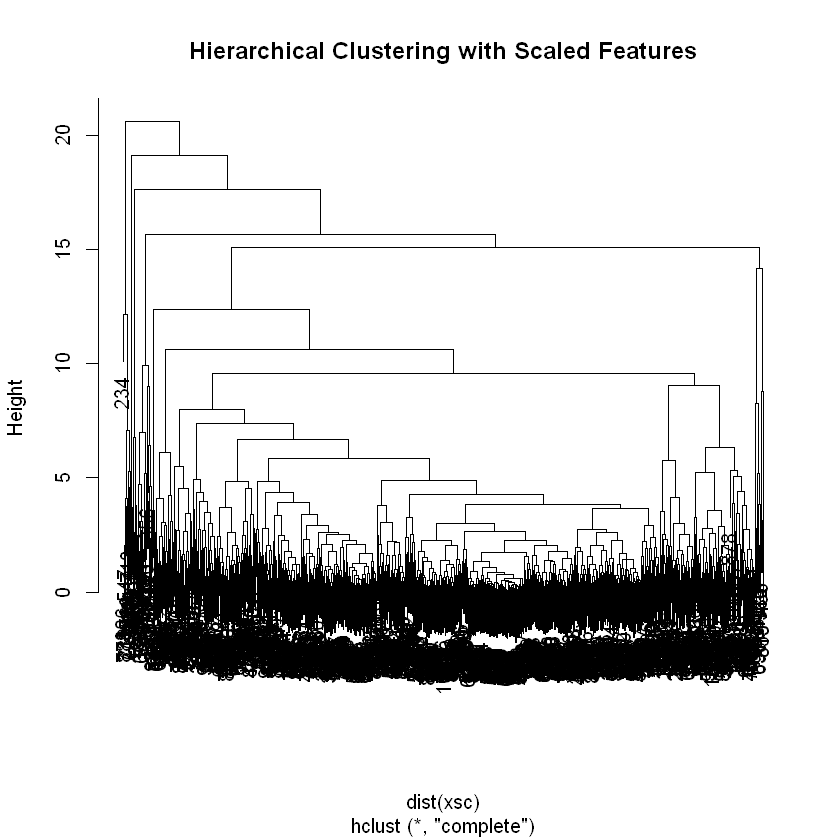

In [39]:
xsc= scale(stat)
plot(hclust(dist(xsc),method="complete"), main="Hierarchical Clustering with Scaled Features")

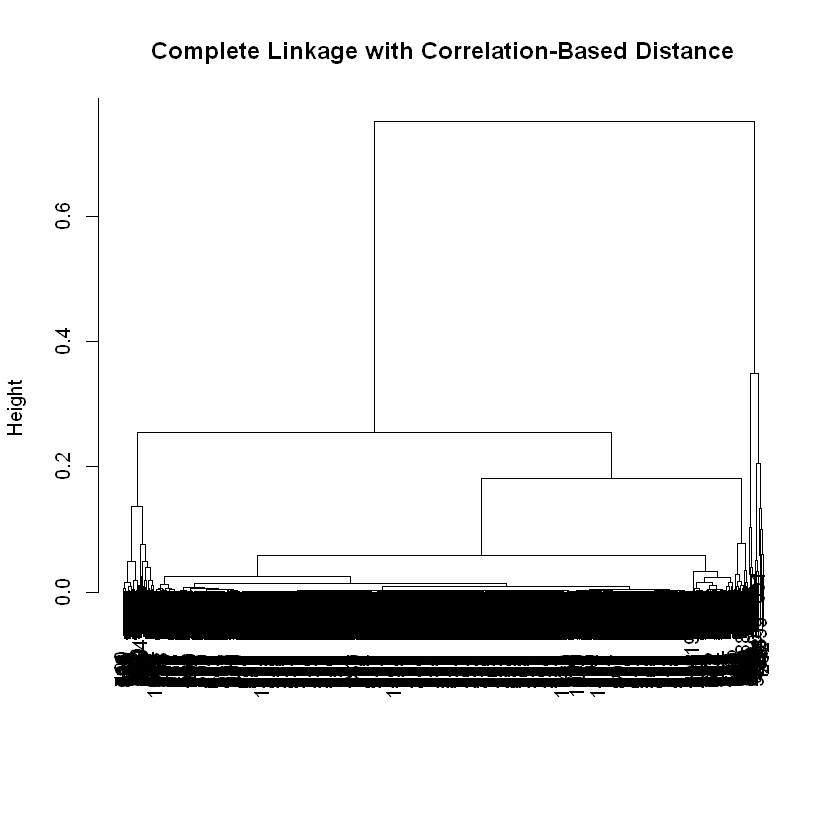

In [40]:
dd=as.dist(1-cor(t(stat)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance",
    xlab="", sub="")